In [118]:
import hashlib
import requests
import datetime
import pandas as pd

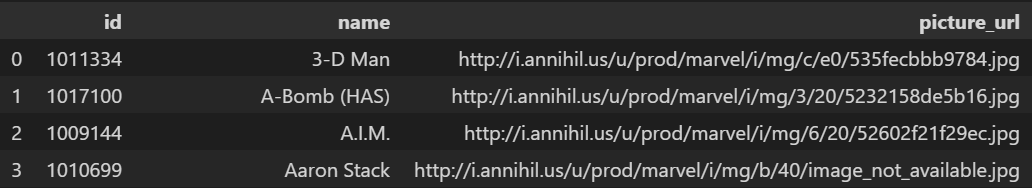

In [119]:
def hash_params(timestamp,priv_key,pub_key):
    """ Marvel API requires server side API calls to include
    md5 hash of timestamp + public key + private key """

    hash_md5 = hashlib.md5()
    hash_md5.update(f'{timestamp}{priv_key}{pub_key}'.encode('utf-8'))
    hashed_params = hash_md5.hexdigest()

    return hashed_params

In [120]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d%H:%M:%S')

pub_key = 'b4166d77ce5df35957b589bef29c81e7'
priv_key = '3aa28635cc0229247b8c1eb01a0af6b3cffefa72'

params = {'ts': timestamp, 
        'apikey': pub_key, 
        'hash': hash_params(timestamp,priv_key,pub_key),
        'nameStartsWith':"S",
        # 'offset':,
        # 'limit': 100
        #'name':''
        };

url = 'http://gateway.marvel.com/v1/public/characters'

res = requests.get(url,params=params)
res=res.json()
res

{'code': 200,
 'status': 'Ok',
 'copyright': '© 2024 MARVEL',
 'attributionText': 'Data provided by Marvel. © 2024 MARVEL',
 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2024 MARVEL</a>',
 'etag': '164b33d9bd357434e8d72627d9d29898ba51cdca',
 'data': {'offset': 0,
  'limit': 20,
  'total': 202,
  'count': 20,
  'results': [{'id': 1009552,
    'name': 'S.H.I.E.L.D.',
    'description': '',
    'modified': '2017-05-04T14:41:42-0400',
    'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/6/20/51097abb8e306',
     'extension': 'jpg'},
    'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1009552',
    'comics': {'available': 178,
     'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1009552/comics',
     'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/22856',
       'name': 'Adam: Legend of the Blue Marvel (2008) #2'},
      {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/56034',
       

In [124]:
nombres_list = [{'name':marvel['name'],'url':marvel['urls']} for marvel in res['data']['results']]

marvel_df = pd.DataFrame(nombres_list)
marvel_df

,name,url
0,S.H.I.E.L.D.,"[{'type': 'detail', 'url': 'http://marvel.com/..."
1,Sabra,"[{'type': 'detail', 'url': 'http://marvel.com/..."
2,Sabretooth,"[{'type': 'detail', 'url': 'http://marvel.com/..."
3,Sabretooth (Age of Apocalypse),"[{'type': 'detail', 'url': 'http://marvel.com/..."
4,Sabretooth (House of M),"[{'type': 'detail', 'url': 'http://marvel.com/..."
5,Sabretooth (Ultimate),"[{'type': 'detail', 'url': 'http://marvel.com/..."
6,Sage,"[{'type': 'detail', 'url': 'http://marvel.com/..."
7,Salem's Seven (Ultimate),"[{'type': 'detail', 'url': 'http://marvel.com/..."
8,Sally Floyd,"[{'type': 'detail', 'url': 'http://marvel.com/..."
9,Salo,"[{'type': 'detail', 'url': 'http://marvel.com/..."
